
### Part 1: Heuristic Approach



In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

## Data Preparation and Visualization

In [148]:
#Loading the Dataset
df = pd.read_csv('data.csv', header=None, names=['feature1', 'feature2', 'target'])
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (100, 3)


,feature1,feature2,target
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


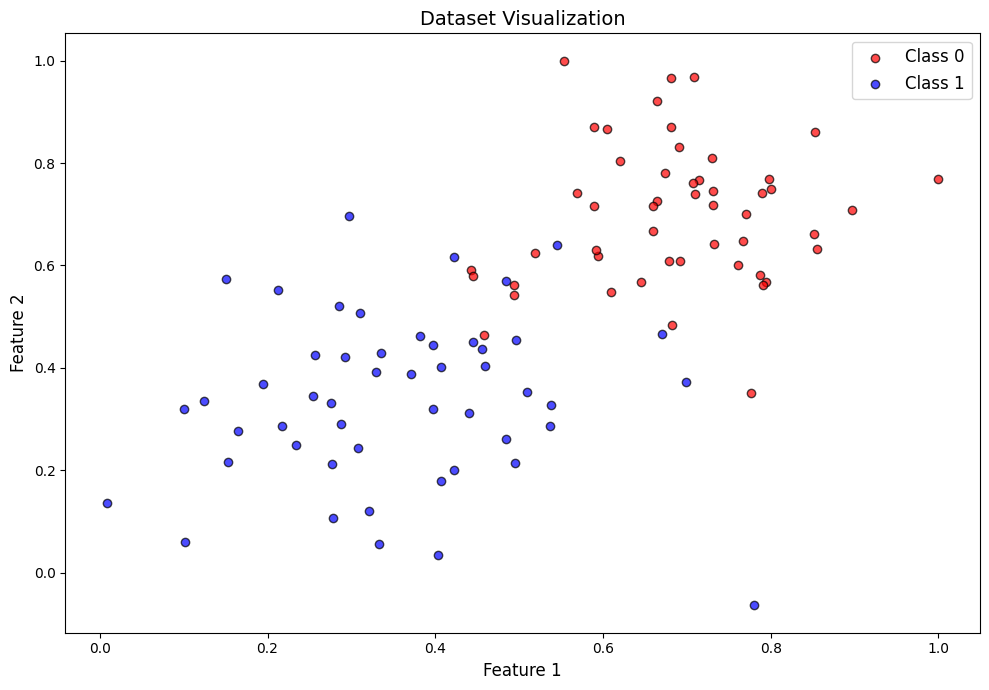

In [149]:
# Visualizing the dataset
def plot_dataset(data, title='Dataset Visualization'):
    plt.figure(figsize=(10, 7))
    class_0 = data[data['target'] == 0]
    class_1 = data[data['target'] == 1]
    
    plt.scatter(class_0['feature1'], class_0['feature2'], c='red', 
                 label='Class 0', alpha=0.7, edgecolors='k')
    plt.scatter(class_1['feature1'], class_1['feature2'], c='blue', 
                 label='Class 1', alpha=0.7, edgecolors='k')
    
    plt.title(title, fontsize=14)
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()
    return plt

# Plot and save the visualization
plot = plot_dataset(df)
plot.savefig('data_visualization.png')
plot.show()

## Part 1: Perceptron with Heuristic Approach

In [150]:
class HeuristicPerceptron:
    """
    Perceptron implementation using the heuristic approach.
    """
    
    def __init__(self, eta=0.1, max_iter=1000):
        """
        Initialize perceptron parameters
        
        Parameters:
        -----------
        eta : float
            Learning rate (between 0.0 and 1.0)
        max_iter : int
            Maximum number of iterations over the training dataset
        """
        self.eta = eta
        self.max_iter = max_iter
        self.w = None  # Weight vector
        self.b = None  # Bias
        self.boundaries = []  # To store boundaries during training
        
    def _init_weights(self, X):
        """Initialize weights with small random values"""
        n_features = X.shape[1]
        self.w = np.random.normal(loc=0.0, scale=0.01, size=n_features)
        self.b = np.random.normal(loc=0.0, scale=0.01)
        self.boundaries.append((self.w.copy(), self.b, 'initial'))
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w) + self.b
        
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        
    def fit(self, X, y):
        """
        Fit training data
        
        Parameters:
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors
        y : array-like, shape = [n_samples]
            Target values
            
        Returns:
        --------
        self : object
        """
        self._init_weights(X)
        
        iterations = 0
        errors = True
        
        # Keep training until convergence or max iterations reached
        while errors and iterations < self.max_iter:
            errors = False
            for xi, target in zip(X, y):
                # Prediction
                prediction = self.predict(xi.reshape(1, -1))[0]
                
                # Update weights if prediction is wrong
                if prediction != target:
                    update = self.eta * (target - prediction)
                    self.w += update * xi
                    self.b += update
                    errors = True
                    
            # Store boundary after each iteration with errors
            if errors:
                self.boundaries.append((self.w.copy(), self.b, 'intermediate'))
            
            iterations += 1
            
        # Store final boundary
        self.boundaries.append((self.w.copy(), self.b, 'final'))
        
        return iterations
        
    def visualize_boundaries(self, X, y, title=''):
        """
        Visualize decision boundaries at different stages
        
        Parameters:
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors
        y : array-like, shape = [n_samples]
            Target values
        title : str
            Plot title
        """
        plt.figure(figsize=(10, 7))
        
        # Plot data points
        plt.scatter(X[y==0, 0], X[y==0, 1], 
                   color='red', label='Class 0')
        plt.scatter(X[y==1, 0], X[y==1, 1], 
                   color='blue', label='Class 1')
        
        # Plot decision boundaries
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x1_coords = np.linspace(x_min, x_max, 100)
        
        for weights, bias, boundary_type in self.boundaries:
            if weights[1] != 0:  # Avoid division by zero
                # Decision boundary equation: w[0]*x1 + w[1]*x2 + b = 0
                # Solve for x2: x2 = (-w[0]*x1 - b) / w[1]
                x2_coords = -(weights[0] * x1_coords + bias) / weights[1]
                
                if boundary_type == 'initial':
                    plt.plot(x1_coords, x2_coords, 'r-', linewidth=2, 
                             label='Initial boundary')
                elif boundary_type == 'intermediate':
                    plt.plot(x1_coords, x2_coords, 'g--', linewidth=1, 
                             alpha=0.3, label='_nolegend_')
                elif boundary_type == 'final':
                    plt.plot(x1_coords, x2_coords, 'k-', linewidth=2, 
                             label='Final boundary')
        
        plt.xlabel('Feature 1', fontsize=12)
        plt.ylabel('Feature 2', fontsize=12)
        plt.title(f'Perceptron Decision Boundaries\n{title}', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xlim(x_min, x_max)
        plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)


Training Heuristic Perceptron with learning rate = 0.01


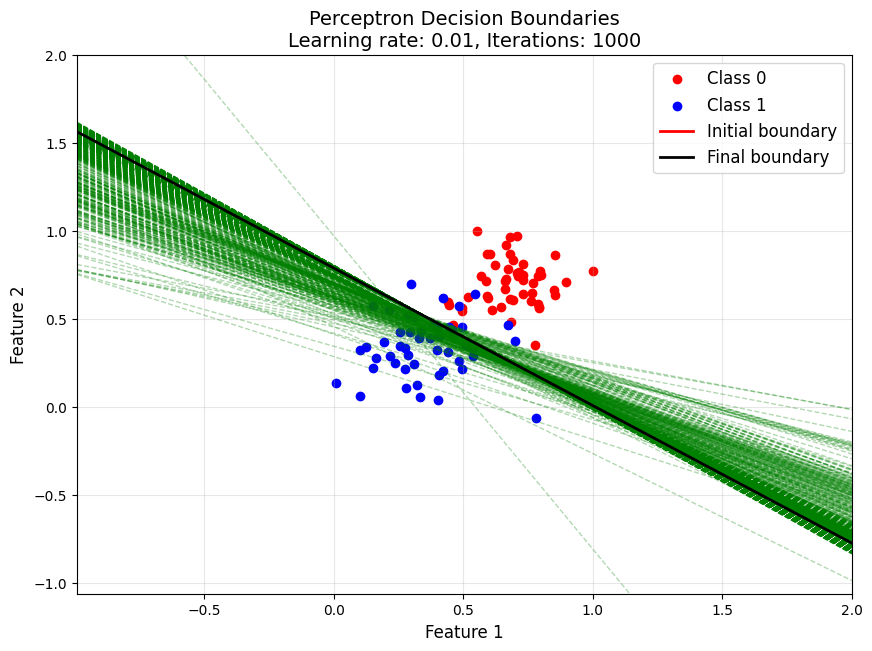


Training Heuristic Perceptron with learning rate = 0.1


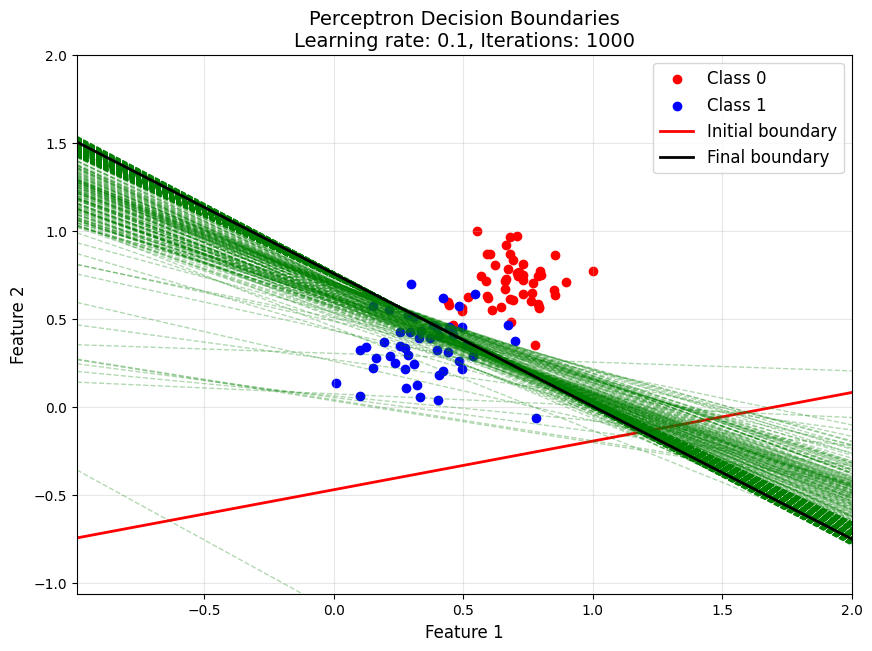


Training Heuristic Perceptron with learning rate = 1.0


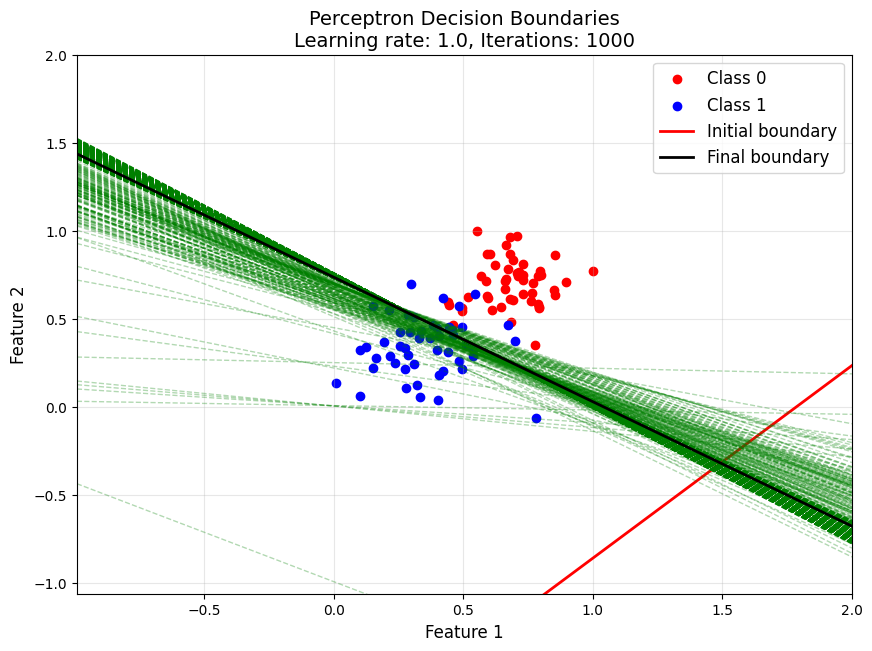


Heuristic Perceptron Results:


,learning_rate,iterations,final_weights,final_bias
0,0.01,1000,"[-0.08848562131355295, -0.11319160101519628]",0.089125
1,0.10,1000,"[-0.8096089688530653, -1.0734394588873453]",0.811117
2,1.00,1000,"[-7.706541201111085, -10.894107363285002]",8.009759


In [151]:
# Prepare data for Part 1
X_train = df[['feature1', 'feature2']].values
y_train = df['target'].values

# Experiment with different learning rates
learning_rates = [0.01, 0.1, 1.0]
heuristic_results = []

for eta in learning_rates:
    print(f"\nTraining Heuristic Perceptron with learning rate = {eta}")
    
    # Train model
    perceptron = HeuristicPerceptron(eta=eta)
    iterations = perceptron.fit(X_train, y_train)
    
    # Visualize and save results
    perceptron.visualize_boundaries(X_train, y_train, 
                                  title=f'Learning rate: {eta}, Iterations: {iterations}')
    plt.savefig(f'heuristic_perceptron_lr_{eta}.png')
    plt.show()
    
    # Store results
    heuristic_results.append({
        'learning_rate': eta,
        'iterations': iterations,
        'final_weights': perceptron.w,
        'final_bias': perceptron.b
    })

# Display results table
print("\nHeuristic Perceptron Results:")
results_table = pd.DataFrame(heuristic_results)
display(results_table)

## Part 2: Perceptron with Gradient Descent Approach

In [157]:
class GradientDescentPerceptron:

    def __init__(self, eta=0.1, n_epochs=100):
        self.eta = eta
        self.n_epochs = n_epochs
        self.w = None  # Weight vector
        self.b = None  # Bias
        self.boundaries = []  # To store boundaries during training
        self.cost_history = []  # To store cost values
        self.epoch_records = []  # To store epoch numbers
        
    def _init_weights(self, X):
        n_features = X.shape[1]
        self.w = np.random.normal( size=n_features)
        self.b = np.random.normal()
        self.boundaries.append((self.w.copy(), self.b, 'initial'))
        
    def _sigmoid(self, z):
        # Clip to avoid overflow
           return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
        
    def activation(self, X):
        return self._sigmoid(np.dot(X, self.w) + self.b)
        
    def predict(self, X, threshold=0.5):
        return np.where(self.activation(X) >= threshold, 1, 0)
        
    def compute_cost(self, X, y):
        activation = self.activation(X)
        # Add small epsilon to avoid log(0)
        epsilon = 1e-15
        activation = np.clip(activation, epsilon, 1 - epsilon)
        # Binary cross-entropy
        cost = -np.mean(
            y * np.log(activation) + (1 - y) * np.log(1 - activation)
        )
        return cost
        
    def fit(self, X, y):
     
        self._init_weights(X)
        n_samples = X.shape[0]
        
        # Record initial cost
        initial_cost = self.compute_cost(X, y)
        self.cost_history.append(initial_cost)
        self.epoch_records.append(0)
        
        # Training loop
        for epoch in range(1, self.n_epochs + 1):
            # Forward pass
            output = self.activation(X)
            
            # Compute error
            error = output - y
            
            # Update weights and bias using gradient descent
            grad_w = np.dot(X.T, error) / n_samples
            grad_b = np.sum(error) / n_samples
            
            self.w -= self.eta * grad_w
            self.b -= self.eta * grad_b
            
            # Store intermediate boundaries (at specific intervals)
            if epoch % max(1, self.n_epochs // 10) == 0 and epoch < self.n_epochs:
                self.boundaries.append((self.w.copy(), self.b, 'intermediate'))
            
            # Record cost every 10 epochs
            if epoch % 10 == 0 or epoch == self.n_epochs:
                cost = self.compute_cost(X, y)
                self.cost_history.append(cost)
                self.epoch_records.append(epoch)
        
        # Store final boundary
        self.boundaries.append((self.w.copy(), self.b, 'final'))
        
    def visualize_boundaries(self, X, y, title=''):
       
        plt.figure(figsize=(10, 7))
        
        # Plot data points
        plt.scatter(X[y==0, 0], X[y==0, 1], 
                   color='red', label='Class 0')
        plt.scatter(X[y==1, 0], X[y==1, 1], 
                   color='blue', label='Class 1')
        
        # Plot decision boundaries
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x1_coords = np.linspace(x_min, x_max, 100)
        
        for weights, bias, boundary_type in self.boundaries:
            if weights[1] != 0:  # Avoid division by zero
                # For sigmoid, decision boundary is where activation = 0.5
                # This occurs when net input = 0
                # So: w[0]*x1 + w[1]*x2 + b = 0
                # Solve for x2: x2 = (-w[0]*x1 - b) / w[1]
                x2_coords = -(weights[0] * x1_coords + bias) / weights[1]
                
                if boundary_type == 'initial':
                    plt.plot(x1_coords, x2_coords, 'r-', linewidth=2, 
                             label='Initial boundary')
                elif boundary_type == 'intermediate':
                    plt.plot(x1_coords, x2_coords, 'g--', linewidth=1, 
                             alpha=0.3, label='_nolegend_')
                elif boundary_type == 'final':
                    plt.plot(x1_coords, x2_coords, 'k-', linewidth=2, 
                             label='Final boundary')
        
        plt.xlabel('Feature 1', fontsize=12)
        plt.ylabel('Feature 2', fontsize=12)
        plt.title(f'Perceptron Decision Boundaries\n{title}', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xlim(x_min, x_max)
        plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
        
    def plot_learning_curve(self):
       
        plt.figure(figsize=(10, 6))
        plt.plot(self.epoch_records, self.cost_history, 'b-', marker='o', markersize=6)
        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel('Binary Cross-Entropy', fontsize=12)
        plt.title(f'Error Plot (Every 10 Epochs)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()


Training Gradient Descent Perceptron with learning rate = 0.01, epochs = 100


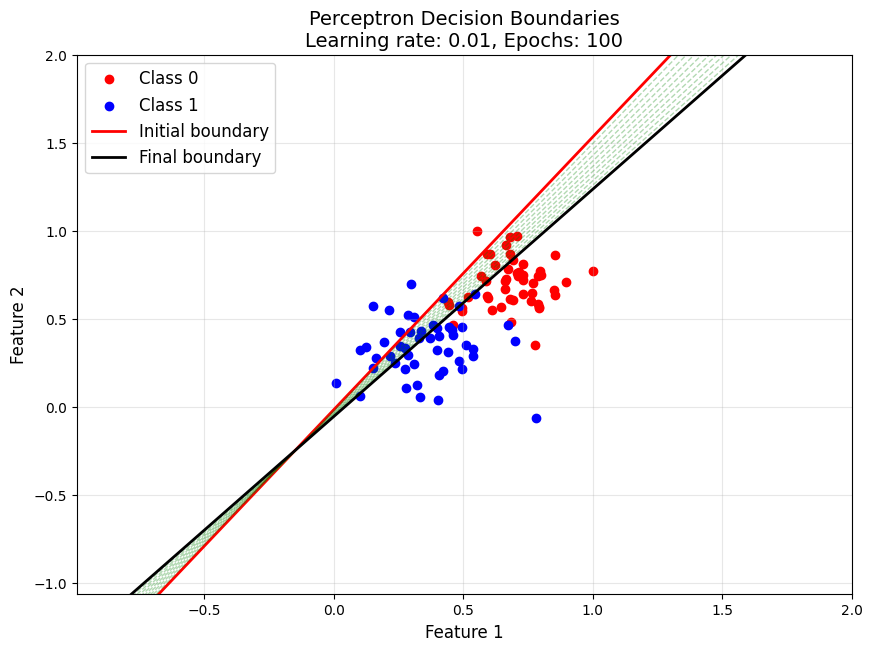

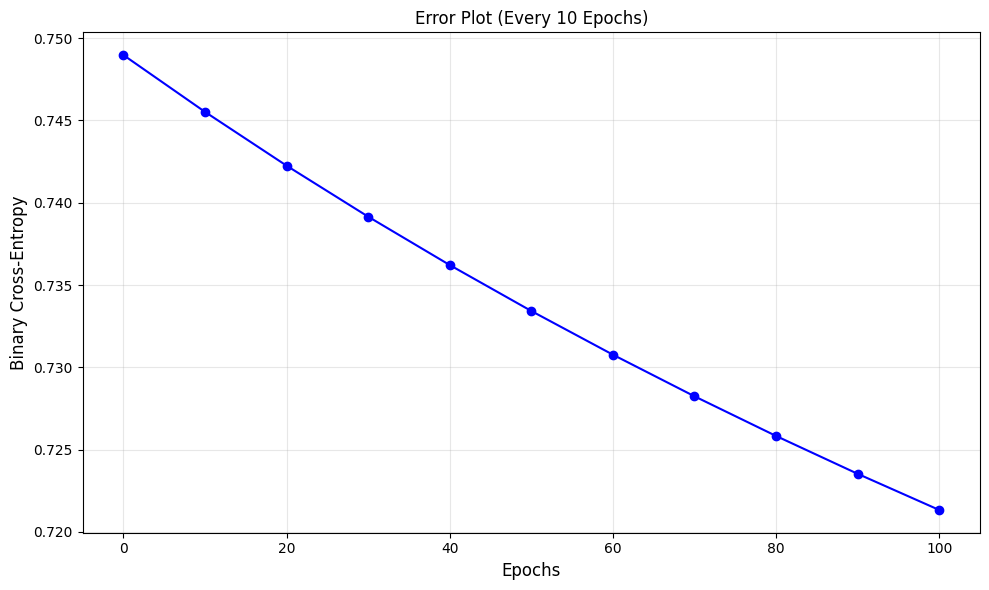


Training Gradient Descent Perceptron with learning rate = 0.1, epochs = 100


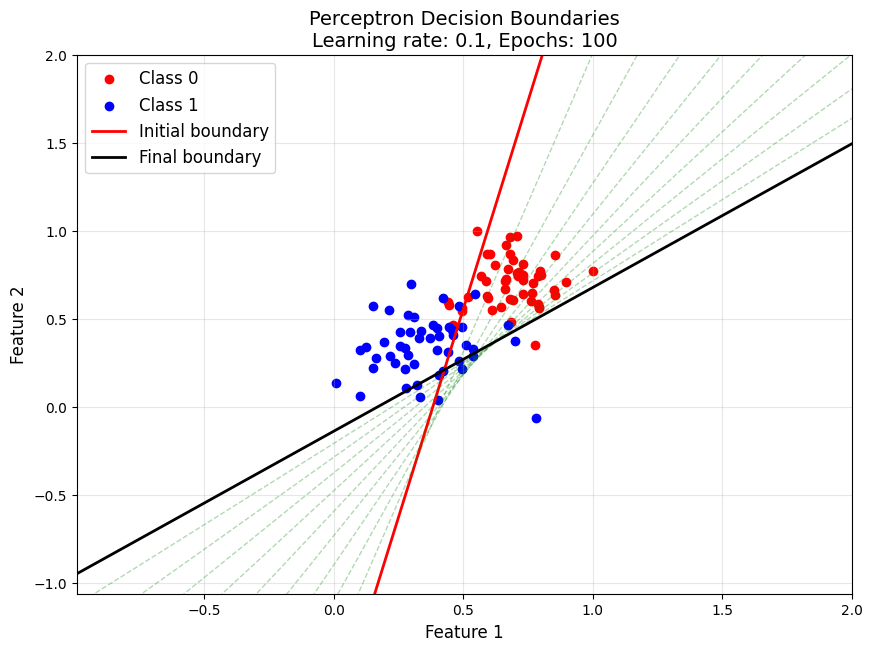

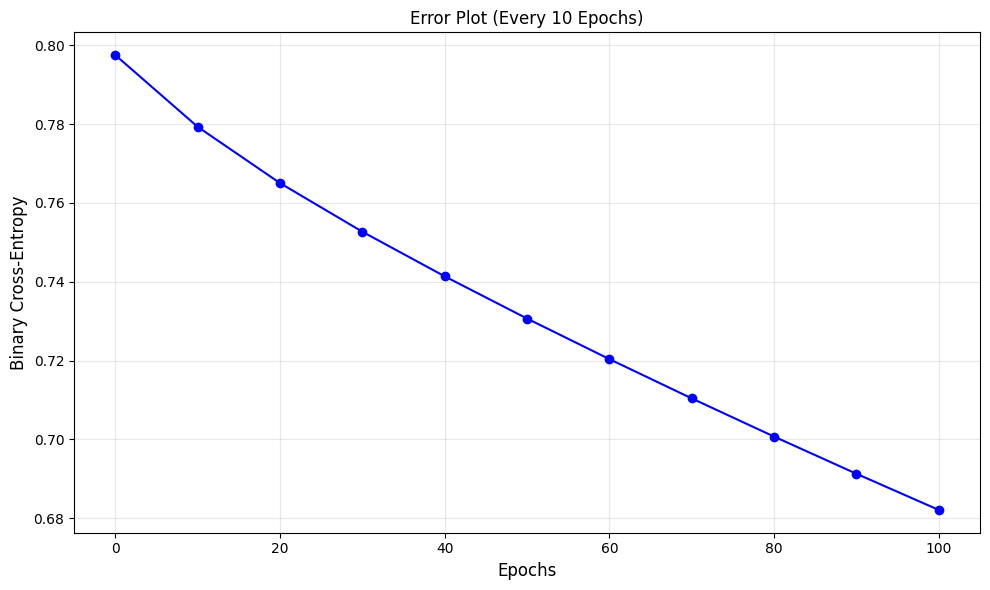


Training Gradient Descent Perceptron with learning rate = 1.0, epochs = 100


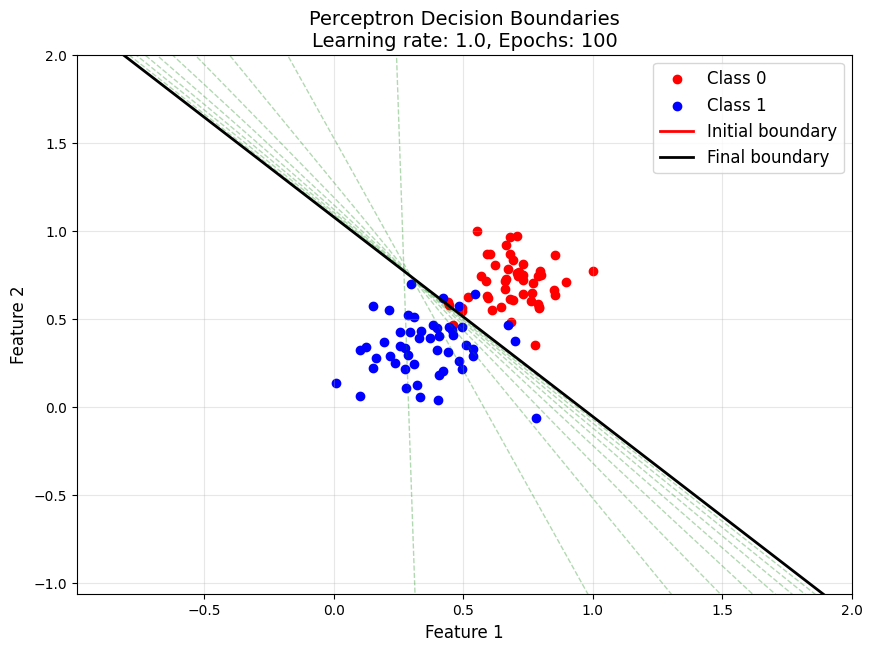

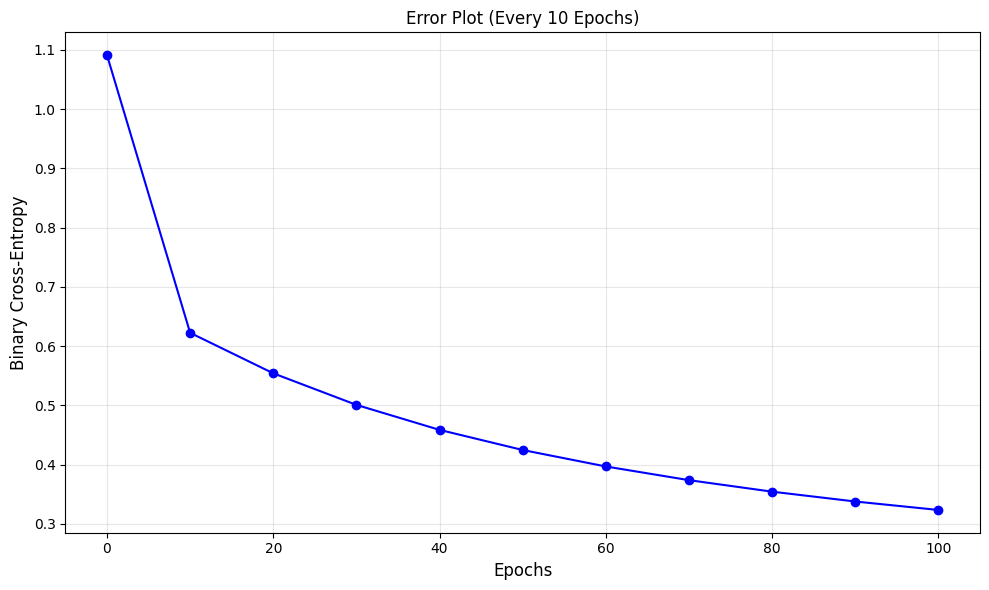


Training Gradient Descent Perceptron with learning rate = 0.1, epochs = 50


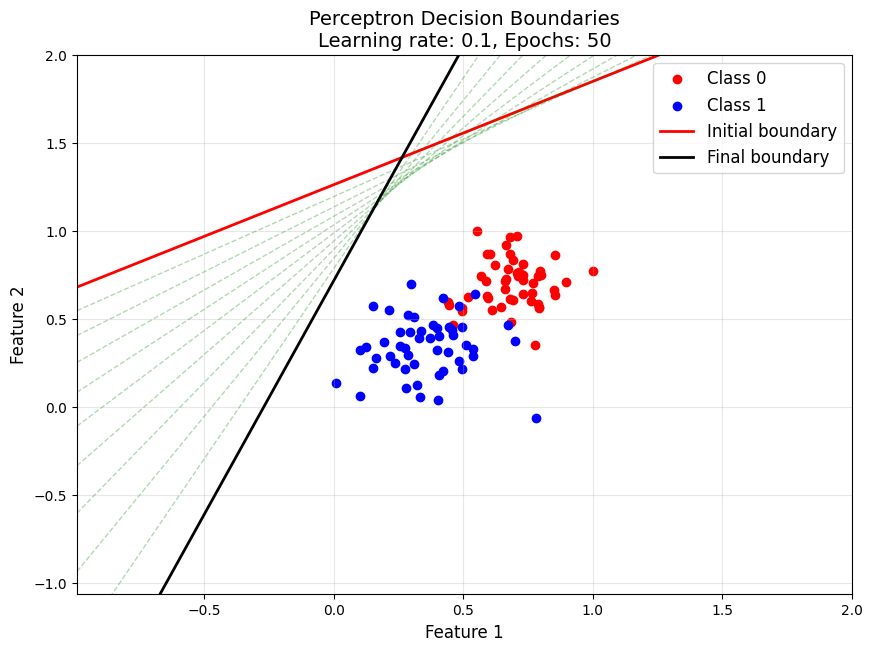

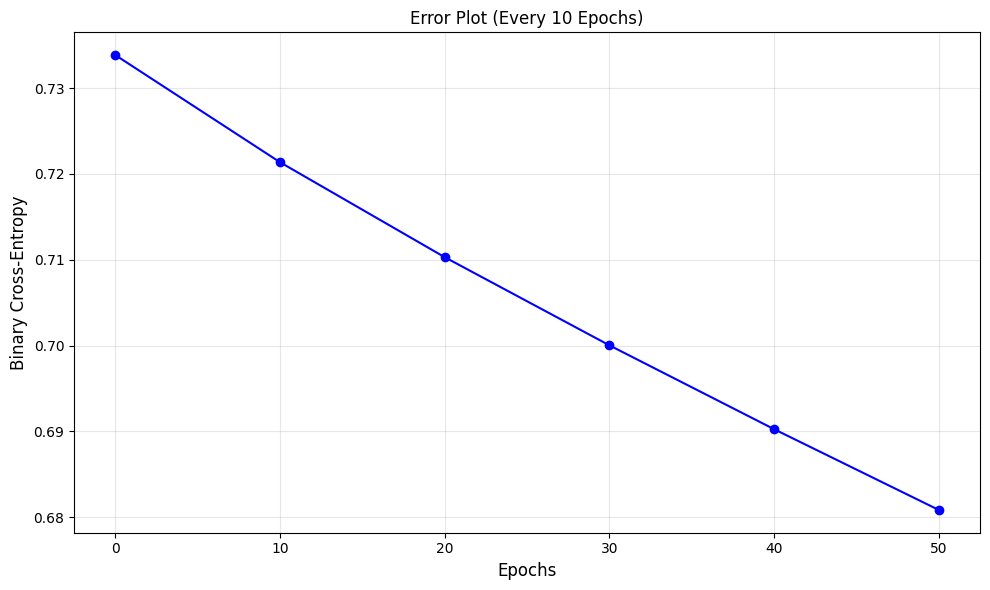


Training Gradient Descent Perceptron with learning rate = 0.1, epochs = 200


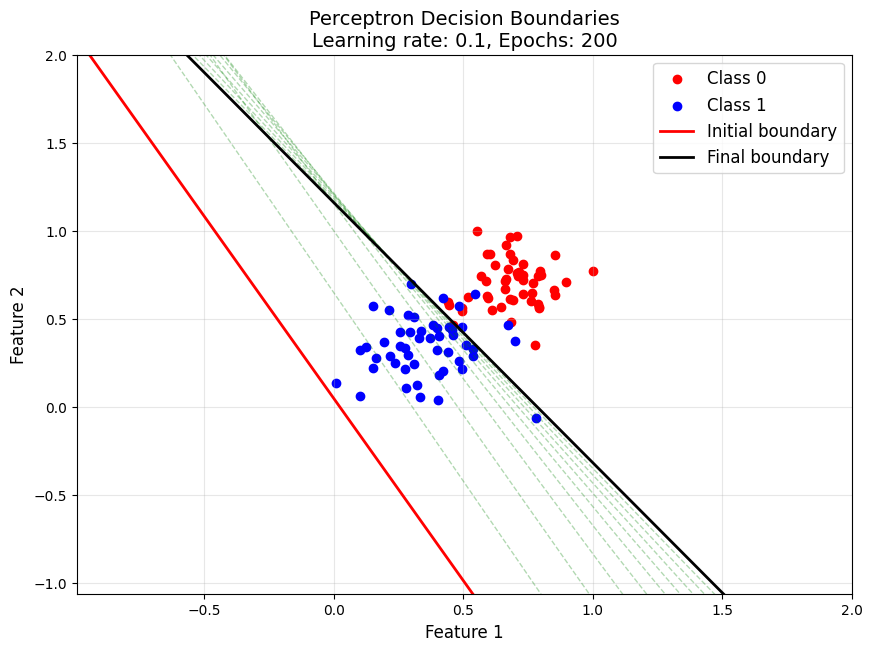

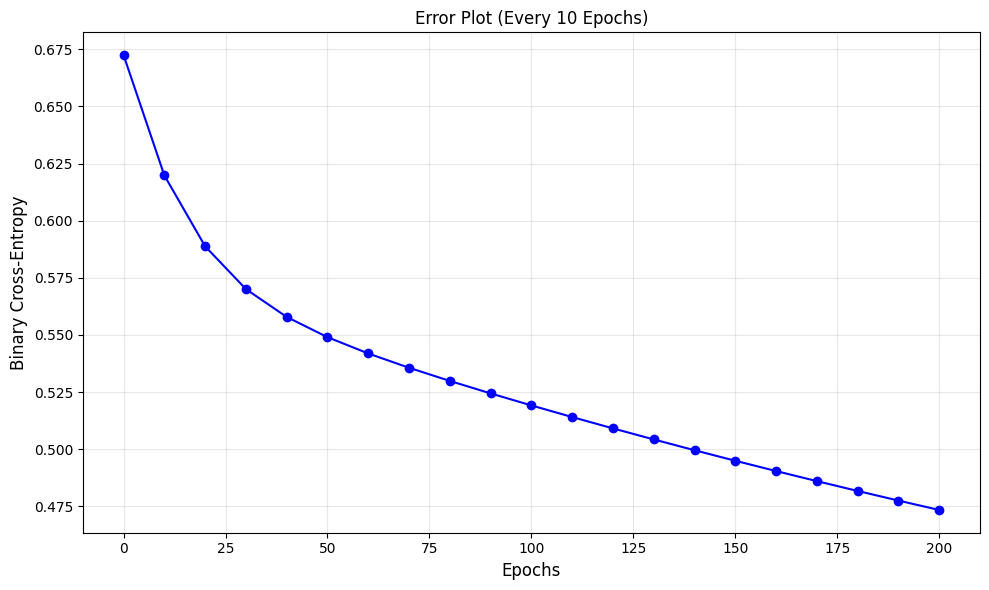


Gradient Descent Perceptron Results:


,learning_rate,epochs,final_weights,final_bias,final_loss
0,0.01,100,"[1.4313607928374827, -1.1076210492702694]",-0.062534,0.721337
1,0.10,100,"[0.8021273441299038, -0.9817886894230485]",-0.137330,0.682102
2,1.00,100,"[-3.524885180654443, -3.1070790274312645]",3.347832,0.323363
3,0.10,50,"[-0.4393984272274689, 0.1653670980032163]",-0.118405,0.680848
4,0.10,200,"[-1.9049515984132264, -1.288095437954917]",1.493788,0.473395


In [158]:
X_train = df[['feature1', 'feature2']].values
y_train = df['target'].values


learning_rates = [0.01, 0.1, 1.0]
epochs_list = [50, 100, 200]
gd_results = []


for eta in learning_rates:
    print(f"\nTraining Gradient Descent Perceptron with learning rate = {eta}, epochs = 100")
    

    perceptron = GradientDescentPerceptron(eta=eta, n_epochs=100)
    perceptron.fit(X_train, y_train)
    
 
    perceptron.visualize_boundaries(X_train, y_train, 
                                   title=f'Learning rate: {eta}, Epochs: 100')
    plt.savefig(f'gd_perceptron_lr_{eta}_boundary.png')
    plt.show()
    
 
    perceptron.plot_learning_curve()
    plt.savefig(f'gd_perceptron_lr_{eta}_error.png')
    plt.show()

    gd_results.append({
        'learning_rate': eta,
        'epochs': 100,
        'final_weights': perceptron.w,
        'final_bias': perceptron.b,
        'final_loss': perceptron.cost_history[-1]
    })


for epochs in epochs_list:
    if epochs == 100:  # Already done above
        continue
        
    print(f"\nTraining Gradient Descent Perceptron with learning rate = 0.1, epochs = {epochs}")
    
    # Train model
    perceptron = GradientDescentPerceptron(eta=0.1, n_epochs=epochs)
    perceptron.fit(X_train, y_train)
    
    # Visualize and save decision boundaries
    perceptron.visualize_boundaries(X_train, y_train, 
                                   title=f'Learning rate: 0.1, Epochs: {epochs}')
    plt.savefig(f'gd_perceptron_epochs_{epochs}_boundary.png')
    plt.show()
    
    # Visualize and save learning curve
    perceptron.plot_learning_curve()
    plt.savefig(f'gd_perceptron_epochs_{epochs}_error.png')
    plt.show()
    
    # Store results
    gd_results.append({
        'learning_rate': 0.1,
        'epochs': epochs,
        'final_weights': perceptron.w,
        'final_bias': perceptron.b,
        'final_loss': perceptron.cost_history[-1]
    })

# Display results table
print("\nGradient Descent Perceptron Results:")
results_table = pd.DataFrame(gd_results)
display(results_table)

## Part 1: Analysis of Results

The heuristic approach implements a perceptron that updates weights only when misclassifications occur. We observe the following from the experiments with different learning rates:

- Higher learning rates lead to faster convergence but can potentially overshoot the optimal solution
- Lower learning rates converge more slowly but may find a more stable solution
- The decision boundaries evolve from the initial (red) through intermediate steps (dashed green) to the final boundary (black)

## Part 2: Analysis of Results

The gradient descent approach implements a perceptron that continuously updates weights based on error gradients. We observe the following from our experiments:

- The learning rate significantly impacts both convergence speed and final solution quality
- Too high learning rates can lead to unstable learning or divergence
- Too low learning rates result in slow convergence
- The number of epochs is crucial - too few epochs may lead to underfitting, while too many may not provide significant improvements
- The error curves show how the binary cross-entropy loss decreases over epochs